In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d abhisheksinghblr/emergency-vehicles-identification

 39% 12.0M/30.9M [00:00<00:00, 39.8MB/s]
100% 30.9M/30.9M [00:00<00:00, 85.7MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/emergency-vehicles-identification.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [6]:
train_folder=os.listdir('/content/Emergency_Vehicles/train')
print(train_folder)
print(len(train_folder))

['779.jpg', '1490.jpg', '119.jpg', '1133.jpg', '1587.jpg', '2264.jpg', '1781.jpg', '1217.jpg', '775.jpg', '1830.jpg', '195.jpg', '1358.jpg', '1820.jpg', '1135.jpg', '236.jpg', '418.jpg', '1482.jpg', '1450.jpg', '15.jpg', '830.jpg', '1980.jpg', '966.jpg', '1915.jpg', '1803.jpg', '665.jpg', '2314.jpg', '1733.jpg', '449.jpg', '394.jpg', '2104.jpg', '1449.jpg', '1106.jpg', '2121.jpg', '2190.jpg', '384.jpg', '1912.jpg', '1849.jpg', '687.jpg', '373.jpg', '1615.jpg', '824.jpg', '333.jpg', '492.jpg', '799.jpg', '1833.jpg', '194.jpg', '1664.jpg', '180.jpg', '771.jpg', '784.jpg', '132.jpg', '2291.jpg', '942.jpg', '1066.jpg', '1806.jpg', '1277.jpg', '1704.jpg', '2251.jpg', '309.jpg', '1297.jpg', '1275.jpg', '2032.jpg', '984.jpg', '201.jpg', '1775.jpg', '1571.jpg', '412.jpg', '616.jpg', '2332.jpg', '828.jpg', '2281.jpg', '1095.jpg', '739.jpg', '30.jpg', '1727.jpg', '1507.jpg', '363.jpg', '1612.jpg', '1361.jpg', '89.jpg', '1751.jpg', '1782.jpg', '191.jpg', '1739.jpg', '716.jpg', '1843.jpg', '1595.j

In [10]:
train_data=pd.read_csv('/content/Emergency_Vehicles/train.csv')
train_data.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [13]:
train_data.shape

(1646, 2)

In [14]:
data=[]

In [15]:
i=0
for img in train_data['image_names']:
  img_path='/content/Emergency_Vehicles/train/'+img
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((64,64))
  img_arr=np.array(img_resize)
  data.append([img_arr,train_data['emergency_or_not'][i]])
  i=i+1

In [16]:
x=[]
y=[]
for k,l in data:
  x.append(k)
  y.append(l)

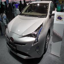

In [17]:
cv2_imshow(x[0])

In [18]:
y[0]

0

In [19]:
train_data.tail()

,image_names,emergency_or_not
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0
1645,860.jpg,1


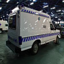

In [20]:
cv2_imshow(x[1645])

In [21]:
y[1645]

1

In [22]:
x=np.array(x)
y=np.array(y)

In [23]:
x_scaled=x/255

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
num_of_classes=2
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x_scaled,y,epochs=10,validation_split=0.1)

Epoch 1/10
47/47 [==============================] - 7s 152ms/step - loss: 0.1365 - accuracy: 0.9487 - val_loss: 0.6305 - val_accuracy: 0.7636
Epoch 2/10
47/47 [==============================] - 12s 265ms/step - loss: 0.1033 - accuracy: 0.9656 - val_loss: 0.8269 - val_accuracy: 0.7515
Epoch 3/10
47/47 [==============================] - 7s 156ms/step - loss: 0.0882 - accuracy: 0.9662 - val_loss: 0.7395 - val_accuracy: 0.7697
Epoch 4/10
47/47 [==============================] - 9s 188ms/step - loss: 0.0652 - accuracy: 0.9777 - val_loss: 0.9265 - val_accuracy: 0.7879
Epoch 5/10
47/47 [==============================] - 9s 187ms/step - loss: 0.0658 - accuracy: 0.9791 - val_loss: 0.8020 - val_accuracy: 0.7758
Epoch 6/10
47/47 [==============================] - 7s 153ms/step - loss: 0.0430 - accuracy: 0.9885 - val_loss: 0.9487 - val_accuracy: 0.7818
Epoch 7/10
47/47 [==============================] - 9s 191ms/step - loss: 0.0522 - accuracy: 0.9845 - val_loss: 0.9755 - val_accuracy: 0.7576
Epoch

In [35]:
img_path='/content/images.jpeg'
img_pillow=Image.open(img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
img_scaled=img_arr/255
img_reshape=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshape)
output=np.argmax(prediction)
if(output==0):
  print('The vehicle is NOT EMERGENCY VEHICLE')
elif(output==1):
  print('The vehicle is EMERGENCY VEHICLE')

1/1 [==============================] - 0s 37ms/step
The vehicle is EMERGENCY VEHICLE
